In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data from excel
df = pd.read_excel('Data/data_flash.xlsx', skiprows=[1])

In [3]:
df

,Pressure,Liquid flow,Temperature,Vapor flow,Mole fraction ethanol in vapor
0,8.396544,41.087268,423.686554,39.934969,0.588747
1,9.082950,48.346588,424.259215,31.457617,0.598482
2,6.216424,67.817254,408.585088,13.055781,0.623558
3,9.225468,59.510814,425.167629,22.426689,0.613161
4,9.664251,60.578692,424.739170,19.518728,0.612980
...,...,...,...,...,...
95,1.667272,51.473235,368.754325,26.801976,0.614382
96,6.464699,40.016087,410.139154,40.787753,0.589927
97,1.563050,58.028562,363.970901,22.552990,0.621157
98,8.090567,73.401544,418.364386,6.508422,0.626177


In [4]:
df.describe()

,Pressure,Liquid flow,Temperature,Vapor flow,Mole fraction ethanol in vapor
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.501223,60.005027,401.525140,19.972336,0.615892
std,2.607997,11.615314,19.983666,11.704624,0.013549
min,1.084085,40.016087,353.714405,-0.110367,0.587500
25%,3.298718,50.201409,386.967753,10.000121,0.606410
50%,5.498753,59.959207,404.947014,20.119785,0.617200
75%,7.742102,69.986606,418.113717,30.278517,0.625522
max,9.925913,79.876256,432.434602,40.787753,0.642213


## Data Normalization (Z-Transformation) 

In [5]:
# Create a pairwise list of the means and std deviations of all variables features = [(mu, sigma)]
features = []

for col in df.columns:
    features.append([df[col].describe()[1], df[col].describe()[2]])

features

[[5.501223414030322, 2.6079974765736704],
 [60.00502664274545, 11.615314083860044],
 [401.5251395913522, 19.98366639308466],
 [19.97233552548323, 11.704623516862114],
 [0.6158921356137048, 0.013549157570718527]]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_norm = df.copy()

#created scaled version of DataFrame
df_norm = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns)

In [7]:
df_norm.describe()

,Pressure,Liquid flow,Temperature,Vapor flow,Mole fraction ethanol in vapor
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.885781e-17,8.237855e-16,2.733369e-15,-1.576517e-16,-2.133849e-15
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.702222e+00,-1.729582e+00,-2.404544e+00,-1.724436e+00,-2.106048e+00
25%,-8.487741e-01,-8.482772e-01,-7.321341e-01,-8.562815e-01,-7.033321e-01
50%,-9.521614e-04,-3.964628e-03,1.720962e-01,1.266101e-02,9.703298e-02
75%,8.635620e-01,8.636757e-01,8.342887e-01,8.849581e-01,7.143098e-01
max,1.705132e+00,1.719397e+00,1.554528e+00,1.787352e+00,1.952419e+00


In [8]:
# a new features list with features_norm = [(mu, sigma)] (normalization check)
features_norm = []

for col in df_norm.columns:
    features_norm.append([int(df_norm[col].describe()[1]), int(df_norm[col].describe()[2])])

features_norm

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]

## PCA with skitlearn

In [9]:
# X = np.asarray(df_norm.iloc[:,:-1]) # normalized feature variables
# y = np.asarray(df_norm.iloc[:,-1])

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_fit = pca.fit_transform(df_norm)

pca_fit

array([[-3.45130816e+00, -4.82198640e-01, -2.57871380e-02,
        -9.09235197e-02],
       [-2.38786765e+00, -1.06757215e+00,  1.55246883e-01,
        -6.68612845e-02],
       [ 8.51380090e-01, -7.76367834e-01, -4.02734974e-02,
         6.75073296e-02],
       [-8.66271582e-01, -1.65081171e+00,  2.25895475e-01,
         1.82555988e-01],
       [-7.25765430e-01, -1.83249252e+00,  3.18978005e-01,
        -4.14272175e-03],
       [-3.35558287e-01,  1.09132402e+00, -1.26545487e-01,
         1.35640892e-03],
       [ 6.05662636e-01, -4.17236189e-01, -5.98984600e-02,
         1.40380525e-01],
       [ 2.68146936e-01,  4.07958252e-01, -1.50731333e-01,
        -7.45923876e-02],
       [-2.02581119e+00, -1.70034993e+00,  9.98924698e-02,
         7.96876573e-02],
       [ 6.55203956e-01, -2.48091981e+00,  8.99699487e-02,
         1.61634779e-02],
       [-1.29984692e+00, -7.39545250e-01,  9.46798985e-02,
        -1.66083898e-02],
       [ 2.75960190e+00, -4.04451944e-01, -1.59237694e-01,
      

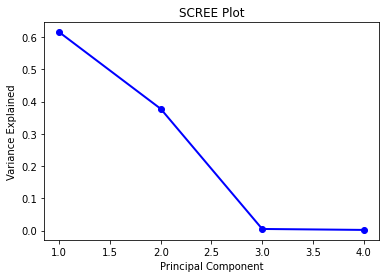

In [11]:
# SCREE plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('SCREE Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [12]:
print(pca.explained_variance_ratio_)

[0.6148619  0.3774114  0.00507315 0.00212988]


In [13]:
pca_fit

array([[-3.45130816e+00, -4.82198640e-01, -2.57871380e-02,
        -9.09235197e-02],
       [-2.38786765e+00, -1.06757215e+00,  1.55246883e-01,
        -6.68612845e-02],
       [ 8.51380090e-01, -7.76367834e-01, -4.02734974e-02,
         6.75073296e-02],
       [-8.66271582e-01, -1.65081171e+00,  2.25895475e-01,
         1.82555988e-01],
       [-7.25765430e-01, -1.83249252e+00,  3.18978005e-01,
        -4.14272175e-03],
       [-3.35558287e-01,  1.09132402e+00, -1.26545487e-01,
         1.35640892e-03],
       [ 6.05662636e-01, -4.17236189e-01, -5.98984600e-02,
         1.40380525e-01],
       [ 2.68146936e-01,  4.07958252e-01, -1.50731333e-01,
        -7.45923876e-02],
       [-2.02581119e+00, -1.70034993e+00,  9.98924698e-02,
         7.96876573e-02],
       [ 6.55203956e-01, -2.48091981e+00,  8.99699487e-02,
         1.61634779e-02],
       [-1.29984692e+00, -7.39545250e-01,  9.46798985e-02,
        -1.66083898e-02],
       [ 2.75960190e+00, -4.04451944e-01, -1.59237694e-01,
      

In [14]:
n = pca_fit.shape[1]

The first Principal Component (PC) explains **61.48 %** and the second PC explains **37.74 %** of the total variation, which sums up to ca. 99 %.

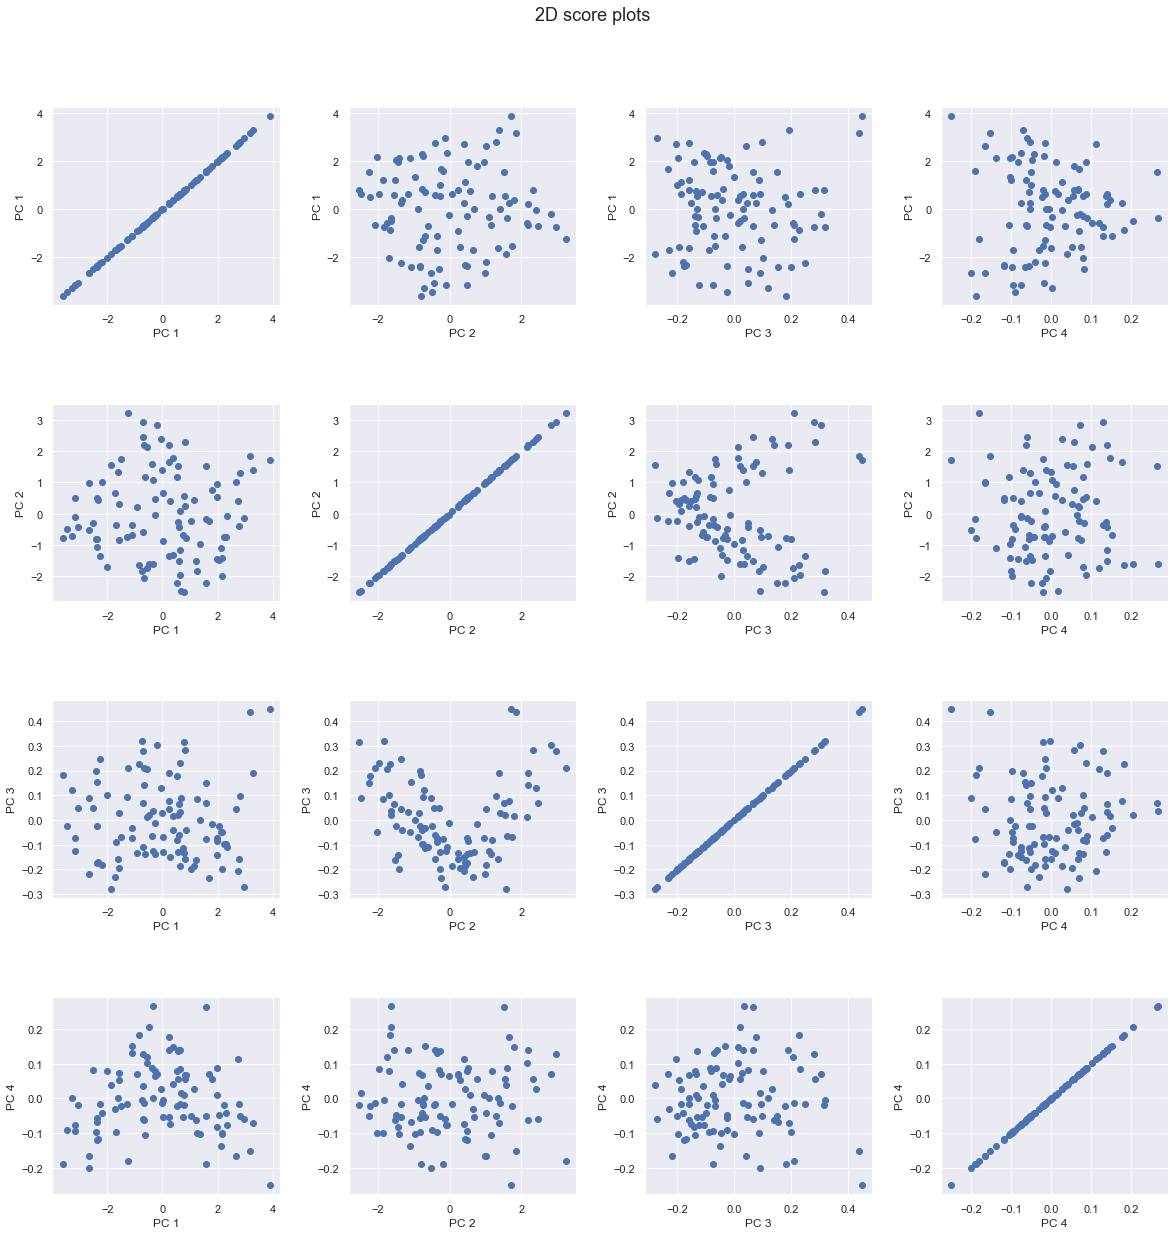

In [30]:
sns.set_theme()

plt.subplots(figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle("2D score plots", fontsize=18, y=0.95)

for i in range(n):
    ax1 = plt.subplot(n, n, i+1).scatter(pca_fit[:,i], pca_fit[:,0])
    plt.xlabel(f"PC {i+1}") 
    plt.ylabel('PC 1')
    
    ax2 = plt.subplot(n, n, i+n+1).scatter(pca_fit[:,i], pca_fit[:,1])
    plt.xlabel(f"PC {i+1}")
    plt.ylabel('PC 2')
    
    ax3 = plt.subplot(n, n, i+(2*n)+1).scatter(pca_fit[:,i], pca_fit[:,2])
    plt.xlabel(f"PC {i+1}")
    plt.ylabel('PC 3')
    
    ax4 = plt.subplot(n, n, i+(2*n)+5).scatter(pca_fit[:,i], pca_fit[:,3])
    plt.xlabel(f"PC {i+1}")
    plt.ylabel('PC 4')

**FAZIT 1**: 
1. Since only the first two PCs explain most of the total variance, the possible loading vector lengths (the variables contribution to the PC) are relatively small for the PCs 3 and 4 (the absolute values on the x- and y-Axis between 0.2 - 0.4). This indicates the insignificance of the PCs. 
2. Nevertheless, there is an observable trend in the scatter plot of PC 3 to PC 2, where the points gather on the diagonals of the 1st and the 2nd quartile and build up a vector of a considerable length in case of the PC 2. Since there are no plotted loadings you cannot read what explanatory variables contribute to these points.

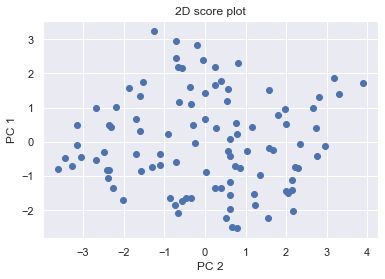

In [24]:
plt.scatter(pca_fit[:,0], pca_fit[:,1])
plt.title('2D score plot')
plt.xlabel('PC 2') 
plt.ylabel('PC 1');

**FAZIT 2**: The scatter plot of the PC 1 to PC 2 doesn't show any significant trends which could be observed in 2 dimensions. The points are equaly distributed in all the quartiles.